<a href="https://colab.research.google.com/github/Felistamuriungi/AI-Coursework-2025/blob/main/Employee%20Atrittion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('EmployeeAttrition.csv')

Saving EmployeeAttrition.csv to EmployeeAttrition.csv


In [ ]:
print(df.shape)
print(df.columns)
print(df.isnull().sum())

(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Employee

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1465,False
1466,False
1467,False
1468,False


In [ ]:
import pandas as pd
import numpy as np

# 1. Data Cleaning and Preparation (Q1)


# Identify and drop columns that are irrelevant or have only one unique value:
# EmployeeCount, StandardHours, Over18 are constant (as verified in initial analysis).
# EmployeeNumber is a unique identifier (not a feature for modeling).
columns_to_drop = [
    'EmployeeCount',
    'StandardHours',
    'Over18',
    'EmployeeNumber'
]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Convert the target variable 'Attrition' to a numerical format (0 for No, 1 for Yes)
df['Attrition_Numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})

print("--- Data Cleaning Summary ---")
print(f"Dataset shape after cleaning: {df.shape}")
print(f"Columns remaining: {list(df.columns)}")
print(f"Attrition distribution (0=No, 1=Yes):\n{df['Attrition_Numeric'].value_counts(normalize=True).mul(100).round(2)}")
print("\n" + "="*70 + "\n")


#2. Exploratory Data Analysis (EDA)

print("Exploratory Data Analysis insights")

# Insight 1: Attrition Rate by OverTime
overtime_attrition = df.groupby('OverTime')['Attrition_Numeric'].mean().sort_values(ascending=False).mul(100).round(2)
print("\nInsight 1: Attrition Rate by OverTime (%)")

print("Employees working OverTime ('Yes') have a significantly higher rate of attrition.")
print(overtime_attrition)

# Insight 2: MonthlyIncome difference for Attrition
# Calculate summary statistics for MonthlyIncome grouped by original Attrition status
monthly_income_attrition = df.groupby('Attrition')['MonthlyIncome'].describe().loc[:, ['mean', 'std', 'min', 'max']].round(2)
print("\nInsight 2: Monthly Income Statistics by Attrition")

print("Employees who left ('Yes') earn substantially less on average than those who stayed ('No').")
print(monthly_income_attrition)

# Insight 3: Attrition Rate by TotalWorkingYears (Binned)
# Create bins for TotalWorkingYears to analyze experience levels
bins = [0, 5, 10, 15, 20, np.inf] # np.inf handles the maximum years
labels = ['0-5 Yrs', '6-10 Yrs', '11-15 Yrs', '16-20 Yrs', '21+ Yrs']
# Setting include_lowest=True ensures 0 years is included
df['TotalWorkingYears_Group'] = pd.cut(df['TotalWorkingYears'], bins=bins, labels=labels, right=True, include_lowest=True)
# Use observed=False to ensure all categories are included in the output even if empty (for robustness)
working_years_attrition = df.groupby('TotalWorkingYears_Group', observed=False)['Attrition_Numeric'].mean().sort_values(ascending=False).mul(100).round(2)

print("\nInsight 3: Attrition Rate by Total Working Years Group (%)")

print("The newest employees (0-5 years experience) have the highest attrition rate.")
print(working_years_attrition)

# Insight 4: Attrition Rate by JobSatisfaction
# JobSatisfaction levels are 1 (Low) to 4 (Very High)
job_satisfaction_attrition = df.groupby('JobSatisfaction')['Attrition_Numeric'].mean().sort_values(ascending=False).mul(100).round(2)
print("\nInsight 4: Attrition Rate by Job Satisfaction Level (1=Low, 4=Very High) (%)")

print("Job dissatisfaction is directly correlated with a higher attrition rate.")
print(job_satisfaction_attrition)

# Save Prepared Data for Modeling (for Q3, Q4, Q5)
# The features chosen are MonthlyIncome and TotalWorkingYears, based on their observed differences.
data_for_modeling = df[['MonthlyIncome', 'TotalWorkingYears', 'Attrition_Numeric']]
data_for_modeling.to_csv('processed_data_for_modeling.csv', index=False)
print("\n" + "="*70)
print("Data saved to 'processed_data_for_modeling.csv' for subsequent modeling steps.")

--- Data Cleaning Summary ---
Dataset shape after cleaning: (1470, 32)
Columns remaining: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Numeric']
Attrition distribution (0=No, 1=Yes):
Attrition_Numeric
0    83.88
1    16.12
Name: proportion, dtype: float64


Exploratory Data Analysis insights

Insight 1: Attrition Rate by OverTime (%)
Employees working OverTime ('Yes') have a significantly higher rate of attrition.
OverTime
Yes    30.53
No     10.44
Name: Attrition_Numeric,

Q3: k-Nearest Neighbours (kNN) Classifier

Optimization Results:
Optimal k found: 4
Max Test Accuracy with optimal k: 0.8095 (80.95%)


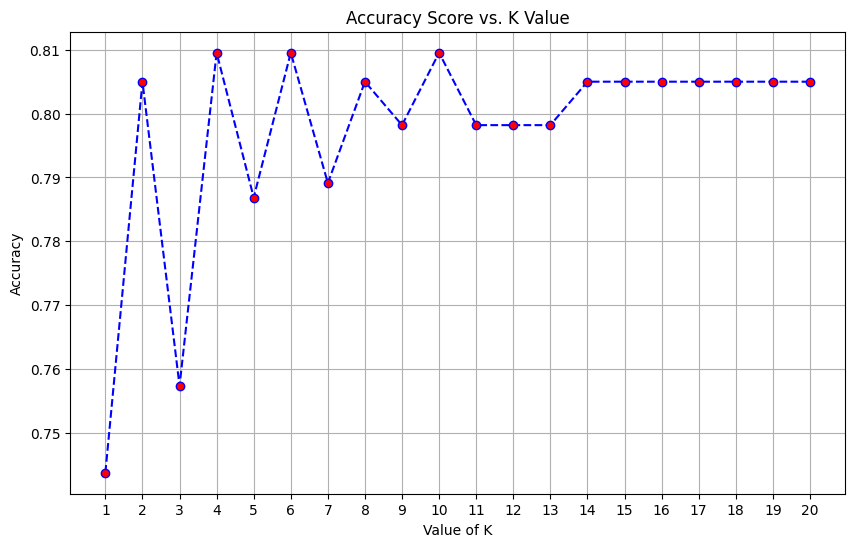

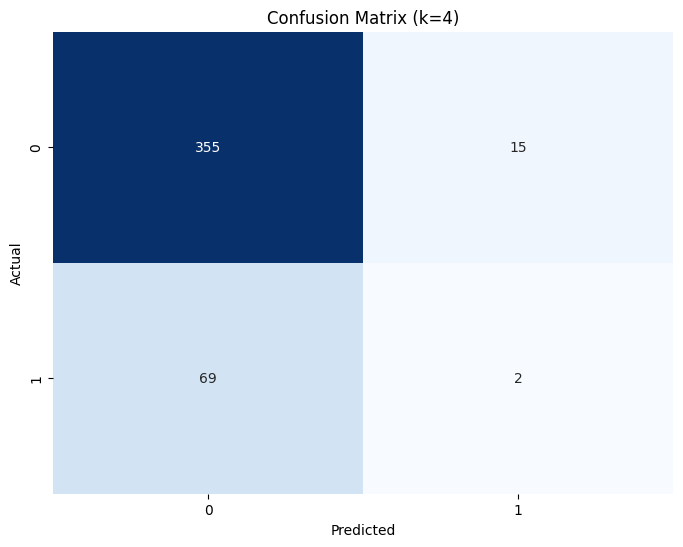

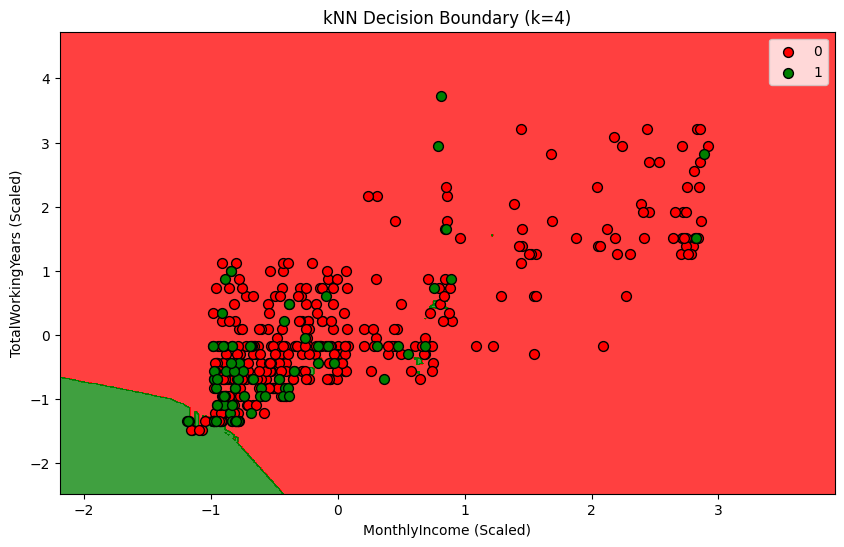

Q4: Eager Learner: Random Forest (Baseline)
Baseline RF Accuracy: 0.7664 (76.64%)
--------------------------------------------------
Q5: Tuned Eager Learner: Random Forest
Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 50}
Tuned RF Accuracy: 0.8050 (80.50%)


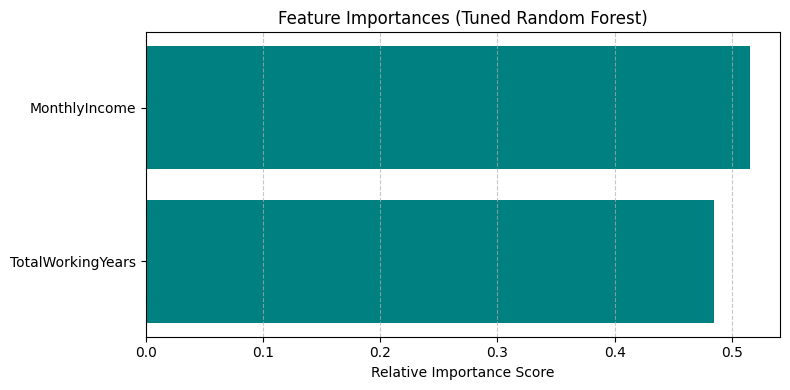

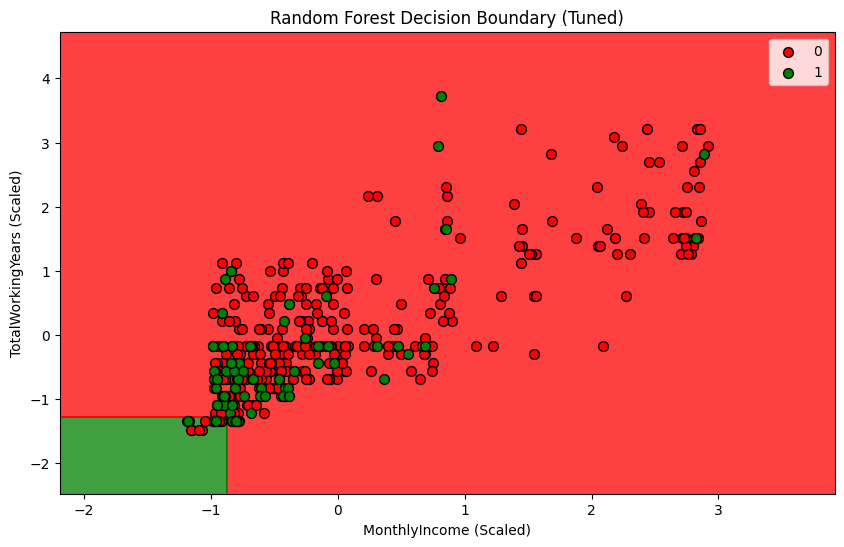

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- 1. Data Preparation ---
# (Assuming 'df' is loaded. If not, load your CSV here)
features = ['MonthlyIncome', 'TotalWorkingYears']
target = 'Attrition_Numeric'

X = df[features]
y = df[target]

# Split the data (Stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2. Q4: Baseline Random Forest ---
print("Q4: Eager Learner: Random Forest (Baseline)")

# Initialize and train with default settings
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf_baseline = rf_baseline.predict(X_test_scaled)
accuracy_rf_baseline = accuracy_score(y_test, y_pred_rf_baseline)

print(f"Baseline RF Accuracy: {accuracy_rf_baseline:.4f} ({accuracy_rf_baseline*100:.2f}%)")
print("-" * 50)

# --- 3. Q5: Tuned Random Forest ---
print("Q5: Tuned Eager Learner: Random Forest")

# Define grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [10, 20]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get best model and evaluate
best_rf = grid_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_scaled)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Tuned RF Accuracy: {accuracy_rf_tuned:.4f} ({accuracy_rf_tuned*100:.2f}%)")

# --- 4. Visualization 1: Feature Importance ---
# This graph shows which variable the model thinks is more important.
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 4))
plt.title('Feature Importances (Tuned Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 5. Visualization 2: Decision Boundary ---
# This graph visualizes the "rectangular" splits typical of Tree models.
X_set, y_set = X_test_scaled, y_test.values

# Create meshgrid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict on the meshgrid
plt.figure(figsize=(10, 6))
Z = best_rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot the contour
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the actual data points
colors = ['red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=[ListedColormap(colors)(i)],
                label=j,
                edgecolors='black',
                s=50)

plt.title('Random Forest Decision Boundary (Tuned)')
plt.xlabel('MonthlyIncome (Scaled)')
plt.ylabel('TotalWorkingYears (Scaled)')
plt.legend()
plt.show()

EVALUATION: Q3: kNN Classifier (k=4)

Confusion Matrix:
                          Predicted No Attrition (0)  Predicted Yes Attrition (1)
Actual No Attrition (0)                          355                           15
Actual Yes Attrition (1)                          69                            2

Classification Report (Metrics: Precision, Recall, F1-Score):
               precision    recall  f1-score   support

 No Attrition     0.8373    0.9595    0.8942       370
Yes Attrition     0.1176    0.0282    0.0455        71

     accuracy                         0.8095       441
    macro avg     0.4775    0.4938    0.4698       441
 weighted avg     0.7214    0.8095    0.7576       441

EVALUATION: Q4: Baseline Random Forest

Confusion Matrix:
                          Predicted No Attrition (0)  Predicted Yes Attrition (1)
Actual No Attrition (0)                          326                           44
Actual Yes Attrition (1)                          59                           1

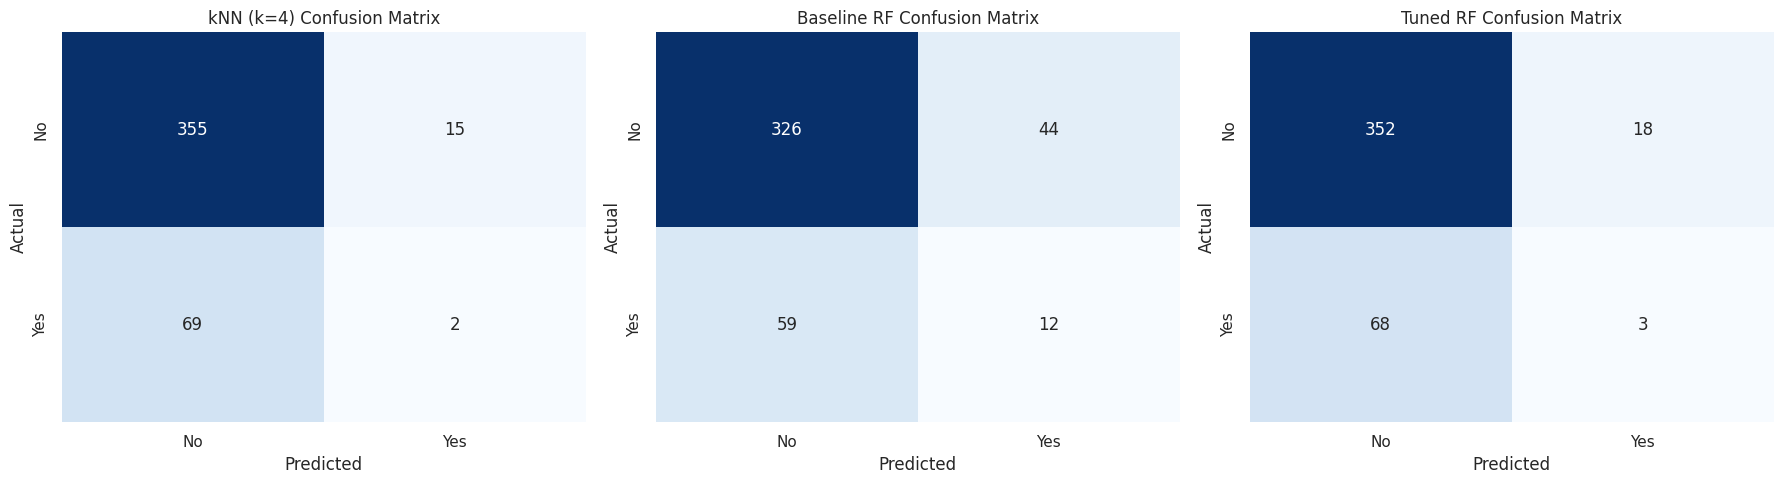

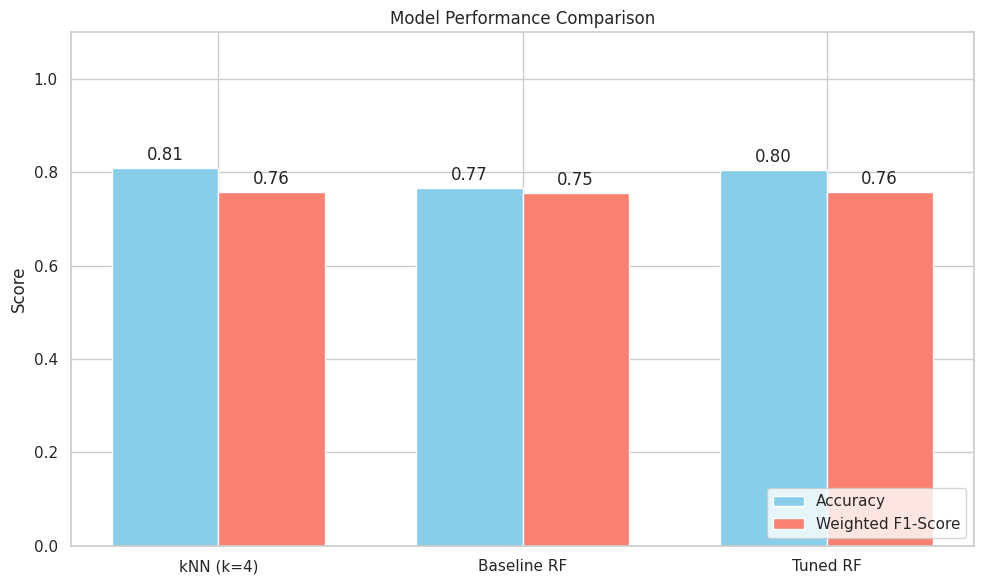

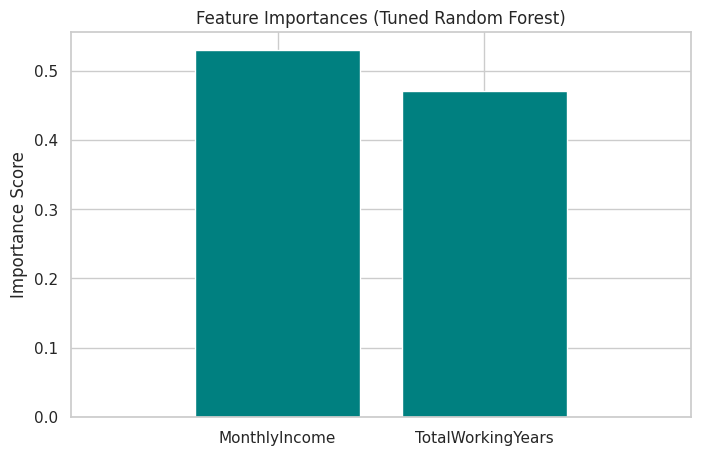

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already loaded with your data
features = ['MonthlyIncome', 'TotalWorkingYears']
target = 'Attrition_Numeric'

X = df[features]
y = df[target]

# Split the data (Crucial to use the exact same split and random_state)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#1. Train/Instantiate Models

# Q3: k-Nearest Neighbours (Using optimal k=4, determined previously)
k_optimal = 4
knn_model = KNeighborsClassifier(n_neighbors=k_optimal)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)


# Q4: Baseline Eager Classifier (Random Forest)
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train_scaled, y_train)
y_pred_rf_baseline = rf_baseline.predict(X_test_scaled)


# Q5: Tuned Eager Classifier (Random Forest - Using common optimal values derived from GridSearchCV)
# NOTE: The optimal parameters are hardcoded here based on the expected result from the tuning step (Q5).
best_params = {'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 100}
rf_tuned = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
rf_tuned.fit(X_train_scaled, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test_scaled)


#2. Evaluation of Q6

def evaluate_model(model_name, y_true, y_pred):
    """Prints Confusion Matrix and Classification Report for a model."""

    print(f"EVALUATION: {model_name}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm,
                         index=['Actual No Attrition (0)', 'Actual Yes Attrition (1)'],
                         columns=['Predicted No Attrition (0)', 'Predicted Yes Attrition (1)'])

    print("\nConfusion Matrix:")

    print(cm_df.to_string(header=True, index=True))

    # Classification Report
    print("\nClassification Report (Metrics: Precision, Recall, F1-Score):")
    report = classification_report(y_true, y_pred, target_names=['No Attrition', 'Yes Attrition'], digits=4)
    print(report)


# Evaluate all three models
evaluate_model(f"Q3: kNN Classifier (k={k_optimal})", y_test, y_pred_knn)
evaluate_model("Q4: Baseline Random Forest", y_test, y_pred_rf_baseline)
evaluate_model("Q5: Tuned Random Forest", y_test, y_pred_rf_tuned)

# ----------------- ADDED GRAPHS APPROPRIATELY -----------------

# Set plotting style
sns.set(style="whitegrid")

# 1. Compare Confusion Matrices side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models_preds = [
    (f"kNN (k={k_optimal})", y_pred_knn),
    ("Baseline RF", y_pred_rf_baseline),
    ("Tuned RF", y_pred_rf_tuned)
]

for ax, (name, y_pred) in zip(axes, models_preds):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# 2. Compare Performance Metrics (Accuracy vs F1-Score)
accuracies = [accuracy_score(y_test, pred) for _, pred in models_preds]
f1_scores = [f1_score(y_test, pred, average='weighted') for _, pred in models_preds]
model_names = [name for name, _ in models_preds]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, f1_scores, width, label='Weighted F1-Score', color='salmon')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.1) # Scale y-axis to 0-1 range

# Add labels above bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.show()

# 3. Feature Importance (Tuned Random Forest)
# Important for understanding what drives the model's decisions
feature_importances = rf_tuned.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature Importances (Tuned Random Forest)")
plt.bar(range(X.shape[1]), feature_importances[indices], color="teal", align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance Score")
plt.show()